In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**load the traing dataset**

In [ ]:
file1 = r'/content/drive/MyDrive/cifar 100 dataset/archive/train'
train_data = unpickle(file1)
file2 = r'/content/drive/MyDrive/cifar 100 dataset/archive/test'
test_data = unpickle(file2)

In [ ]:
print(train_data)
print(test_data)

{'filenames': ['bos_taurus_s_000507.png', 'stegosaurus_s_000125.png', 'mcintosh_s_000643.png', 'altar_boy_s_001435.png', 'cichlid_s_000031.png', 'phone_s_002161.png', 'car_train_s_000043.png', 'beaker_s_000604.png', 'fog_s_000397.png', 'rogue_elephant_s_000421.png', 'computer_keyboard_s_000757.png', 'willow_tree_s_000645.png', 'sunflower_s_000549.png', 'palace_s_000759.png', 'adriatic_s_001782.png', 'computer_keyboard_s_001277.png', 'bike_s_000682.png', 'wolf_pup_s_001323.png', 'squirrel_s_002467.png', 'sea_s_000678.png', 'shrew_s_002233.png', 'pine_tree_s_000087.png', 'rose_s_000373.png', 'surveillance_system_s_000769.png', 'pine_s_001533.png', 'table_s_000897.png', 'opossum_s_001237.png', 'quercus_alba_s_000257.png', 'leopard_s_000414.png', 'possum_s_002195.png', 'bike_s_000127.png', 'balmoral_castle_s_000361.png', 'acer_saccharinum_s_000646.png', 'lapin_s_000916.png', 'chimp_s_001419.png', 'clock_s_002291.png', 'streetcar_s_000663.png', 'male_child_s_000800.png', 'oriental_cockroach

In [ ]:
print(type(train_data))

<class 'dict'>


In [ ]:
#attributes of the dataset
#fine labels(sub classes) will be labelled from 0-99; coarse labels(super classes) are labelled from 0-19
print(train_data.keys())

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])


In [ ]:
for item in train_data:
    print(item, type(train_data[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [ ]:
X_train = train_data['data']
#Each of Dimension(32,32,3)
X_train.shape

(50000, 3072)

In [ ]:
#load the metafile
file = r'/content/drive/MyDrive/cifar 100 dataset/archive/meta'
meta_data = unpickle(file)

In [ ]:
print(meta_data)

{'fine_label_names': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'w

In [ ]:
print(type(meta_data))
print(meta_data.keys())

<class 'dict'>
dict_keys(['fine_label_names', 'coarse_label_names'])


**Data Pre-Processing**

In [ ]:
X_train = train_data['data']
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)

In [ ]:
print(len(X_train))

50000


**Visualising a single Image**

Text(0.5, 1.0, 'Coarse Label Name: people : Fine Label Name: boy')

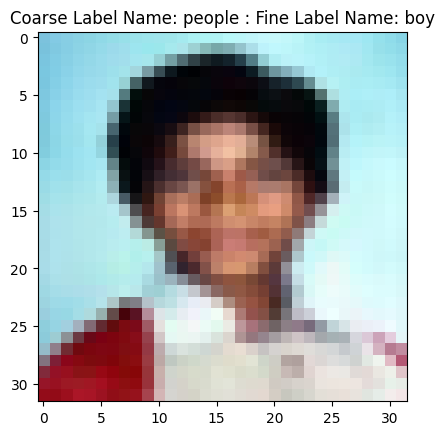

In [ ]:
# Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
# take 4th image from training data
image = train_data['data'][3]
# reshape and transpose the image
image = image.reshape(3,32,32).transpose(1,2,0)
# take coarse and fine labels of the image
c_label = train_data['coarse_labels'][3]
f_label = train_data['fine_labels'][3]
# take coarse and fine label names of the image
coarse_name = meta_data['coarse_label_names'][c_label]
fine_name = meta_data['fine_label_names'][f_label]
# display the image
plt.imshow(image)
plt.title("Coarse Label Name: {} : Fine Label Name: {}".format(coarse_name, fine_name))

**Visualising 10 Images**

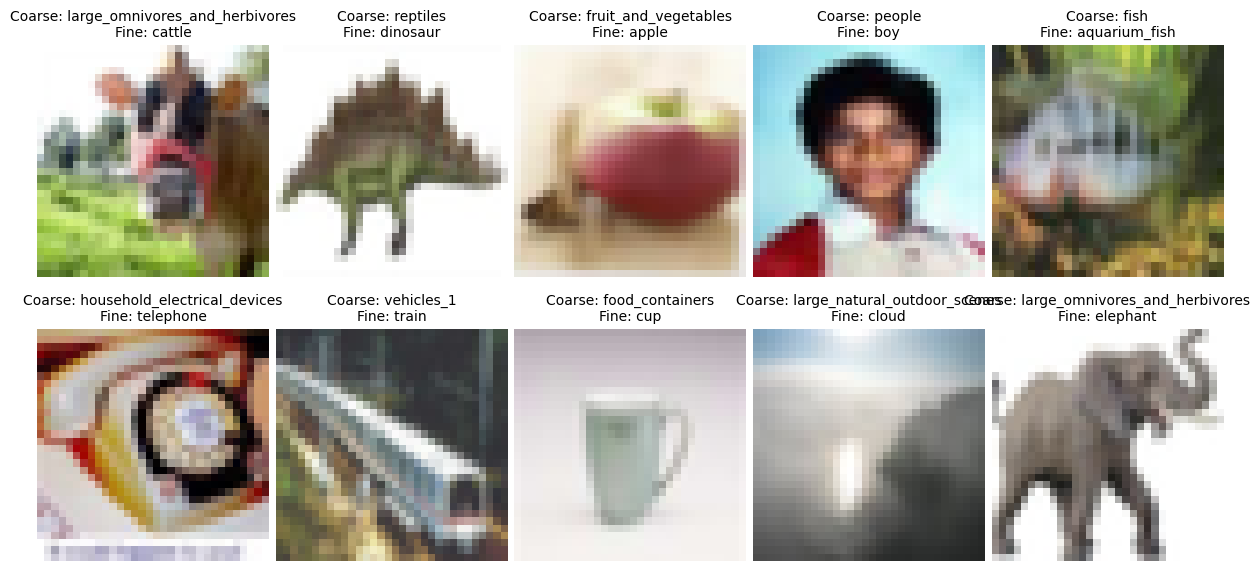

In [ ]:
import matplotlib.pyplot as plt

# Visualize 10 images from the training data
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    image = train_data['data'][i]
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)

    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]

    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    ax = axs[i // 5, i % 5]  # Get the corresponding subplot axes
    ax.imshow(image)
    ax.set_title("Coarse: {}\nFine: {}".format(coarse_name, fine_name), fontsize=10)
    ax.axis('off')  # Remove axis ticks and labels

plt.tight_layout(pad=0.5)  # Adjust subplot spacing
plt.show()


**Rotation Applied to a Single Image**

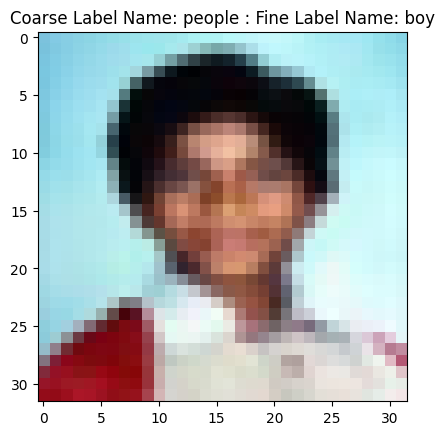

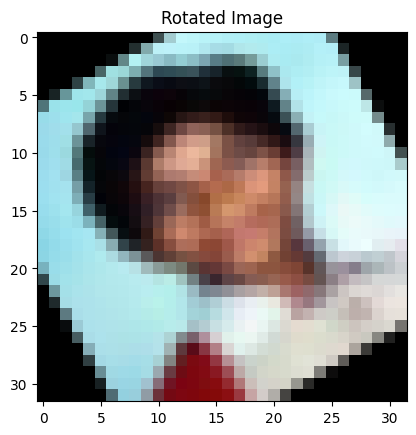

In [ ]:

import matplotlib.pyplot as plt
from skimage.transform import rotate

# Take the 4th image from the training data
image = train_data['data'][3]
# Reshape and transpose the image
image = image.reshape(3, 32, 32).transpose(1, 2, 0)
# Take the coarse and fine labels of the image
c_label = train_data['coarse_labels'][3]
f_label = train_data['fine_labels'][3]
# Take the coarse and fine label names of the image
coarse_name = meta_data['coarse_label_names'][c_label]
fine_name = meta_data['fine_label_names'][f_label]

# Display the original image
plt.imshow(image)
plt.title("Coarse Label Name: {} : Fine Label Name: {}".format(coarse_name, fine_name))
plt.show()

# Apply rotation to the image
rotation_angle = 30  # Specify the rotation angle in degrees
rotated_image = rotate(image, rotation_angle, preserve_range=True).astype(image.dtype)

# Display the rotated image
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()


**Rotation**

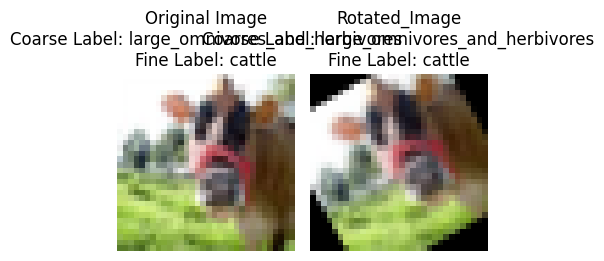

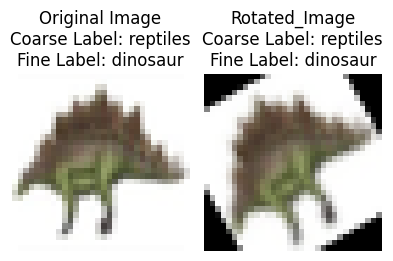

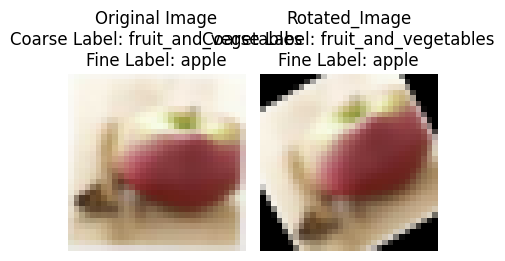

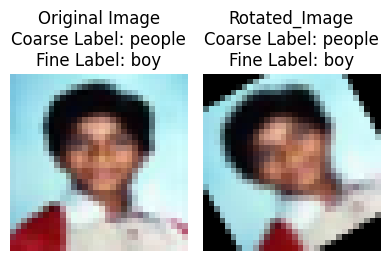

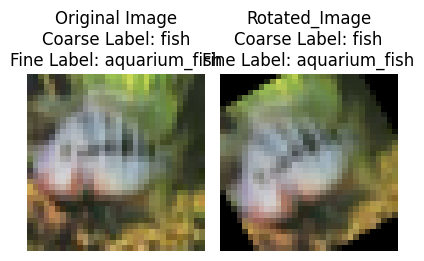

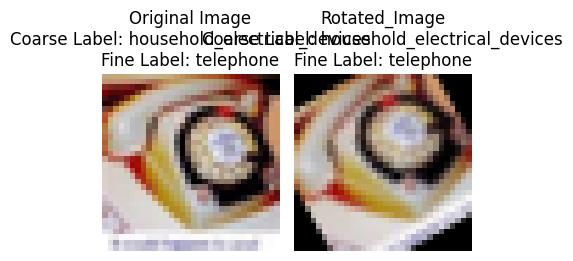

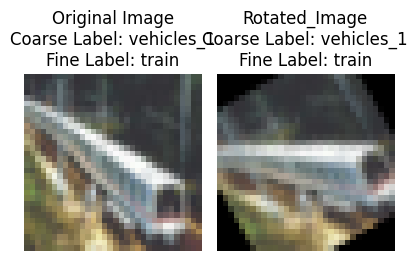

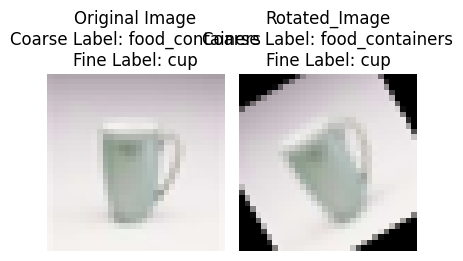

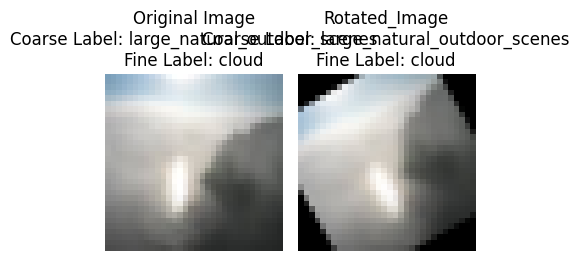

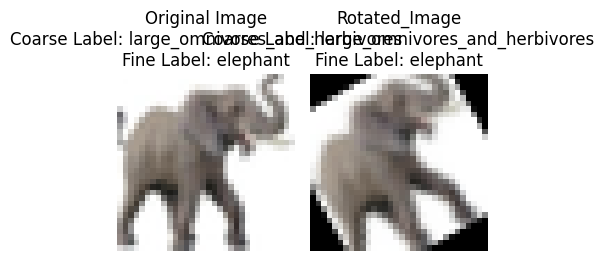

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rotate
from skimage.io import imsave

output_folder = "/content/drive/MyDrive/cifar 100 dataset/original_with_rotation"

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Visualize and save original images with rotated versions
for i in range(10):         #len(train_data['data'])
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]
    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Display the original and rotated images side by side
    fig, axs = plt.subplots(1, 2, figsize=(4, 4))

    # Display the original image
    axs[0].imshow(image)
    axs[0].set_title("Original Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[0].axis('off')  # Remove axis ticks and labels

    # Apply rotation to the image
    rotation_angle = 30  # Specify the rotation angle in degrees
    rotated_image = rotate(image, rotation_angle, preserve_range=True).astype(image.dtype)

    # Display the rotated image
    axs[1].imshow(rotated_image)
    axs[1].set_title("Rotated_Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[1].axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  # Adjust subplot spacing

    # Save the rotated image to the output folder
    output_path = os.path.join(output_folder, "rotated_image_{}.png".format(i))
    imsave(output_path, rotated_image)

    # Show the plot
    plt.show()


**Flipped_Images**

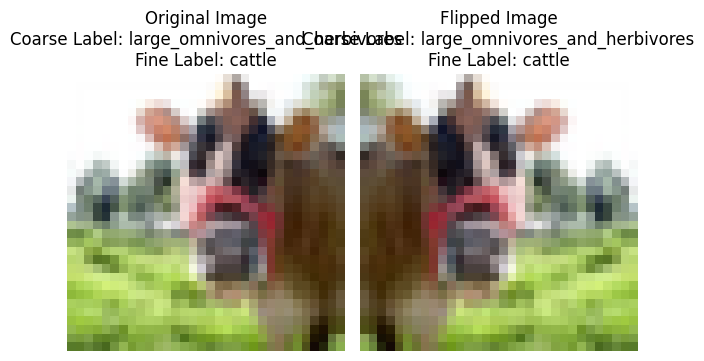

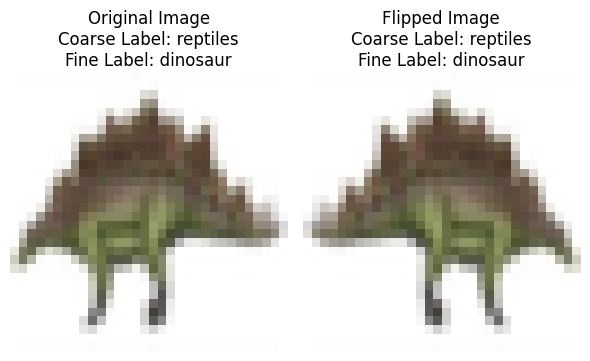

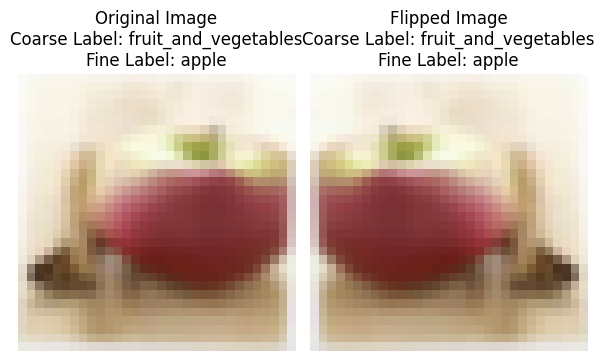

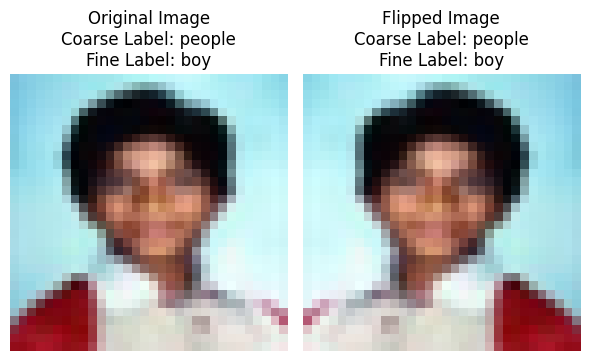

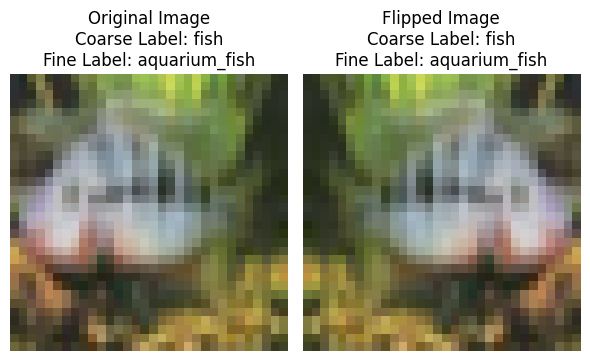

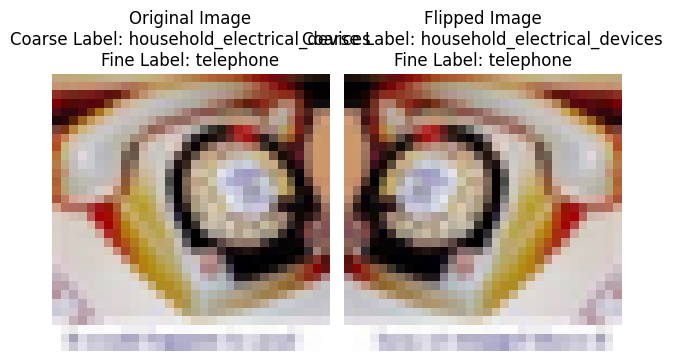

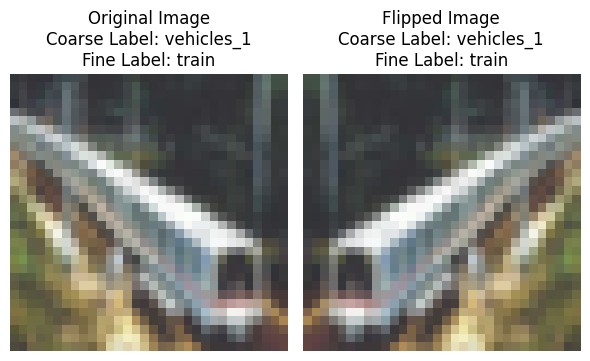

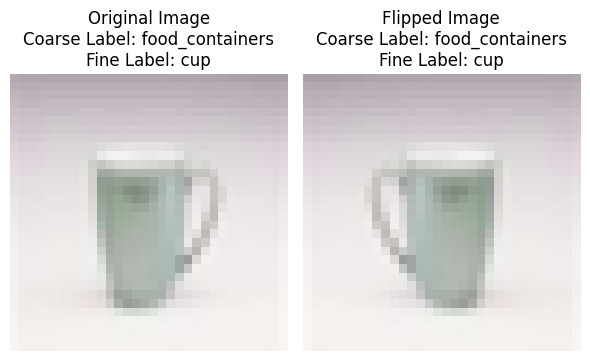

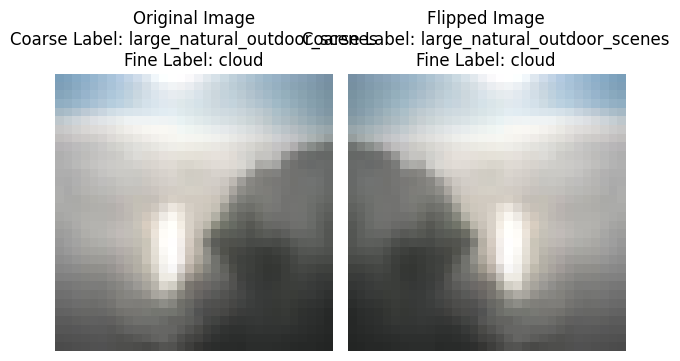

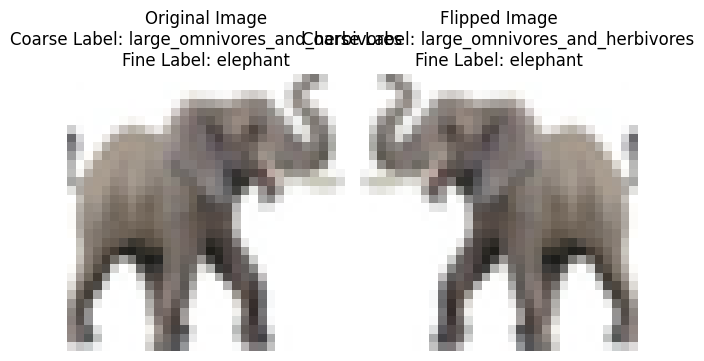

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage.io import imsave

output_folder = "/content/drive/MyDrive/cifar 100 dataset/original with flipped"

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Apply horizontal flipping to 10 images from the training data
for i in range(10):  #len(train_data['data'])
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]
    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Apply horizontal flipping to the image
    flipped_image = image[:, ::-1, :]

    # Save the flipped image to the output folder with labels
    output_path = os.path.join(output_folder, "flipped_image_{}.png".format(i))
    imsave(output_path, flipped_image)

    # Display the original and flipped images with labels
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    axs[0].imshow(image)
    axs[0].set_title("Original Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[0].axis('off')
    axs[1].imshow(flipped_image)
    axs[1].set_title("Flipped Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()


**Random_Cropped**

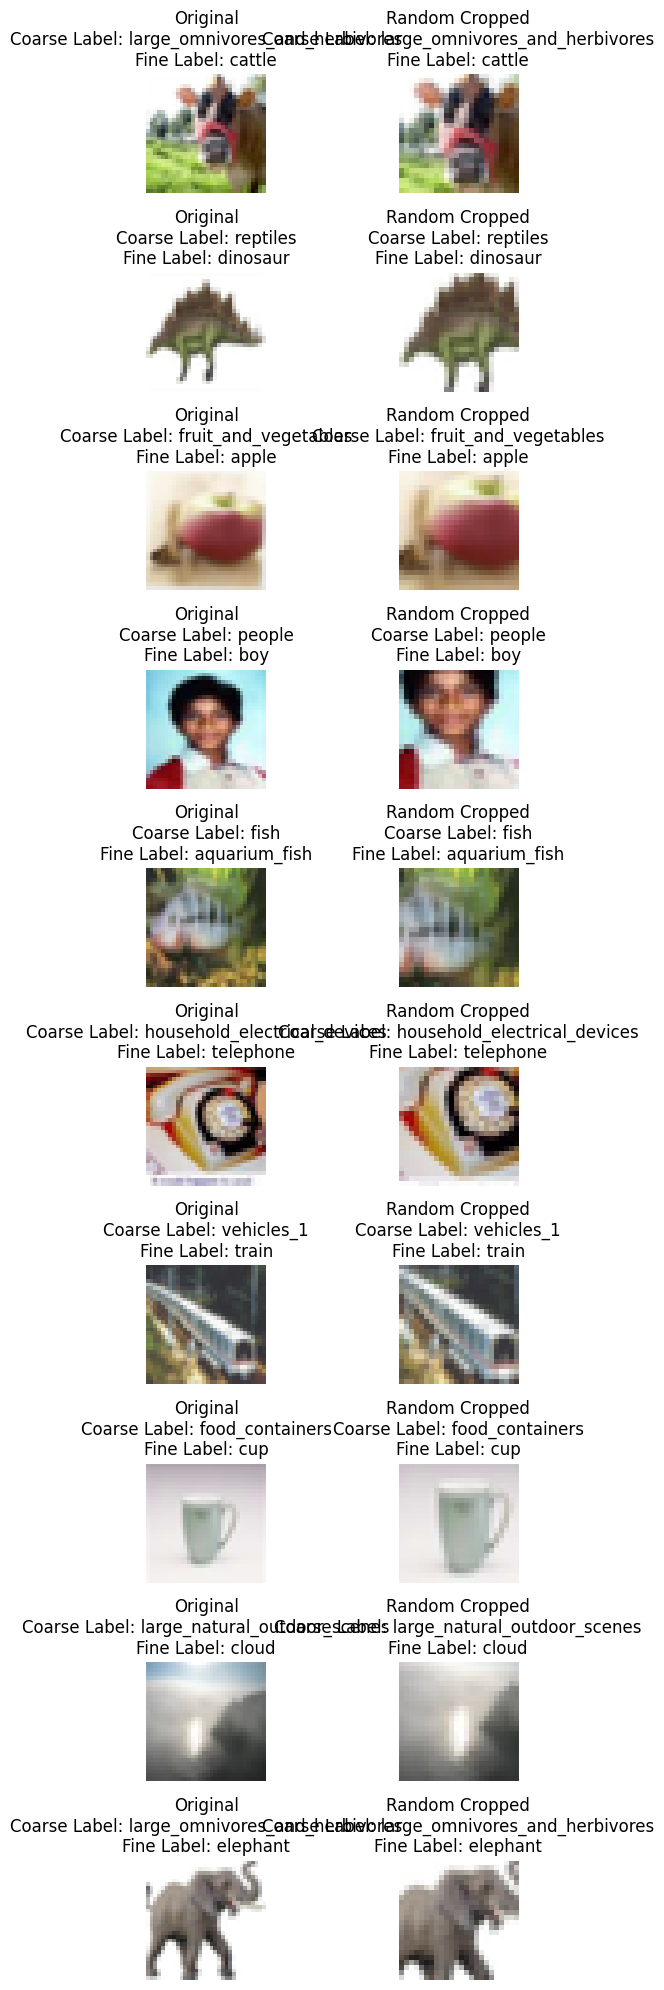

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imsave

output_folder_cropped = "/content/drive/MyDrive/cifar 100 dataset/cropped_images"

# Ensure the output folders exist
if not os.path.exists(output_folder_cropped):
    os.makedirs(output_folder_cropped)

# Create a larger grid for displaying original and cropped images
fig, axs = plt.subplots(10, 2, figsize=(6, 2*10))   #len(train_data['data'])

for i in range(10):
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)

    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]

    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Apply random cropping to the image
    crop_size = (24, 24)  # Specify the crop size
    top_left_y = np.random.randint(0, image.shape[0] - crop_size[0] + 1)
    top_left_x = np.random.randint(0, image.shape[1] - crop_size[1] + 1)
    cropped_image = image[top_left_y:top_left_y+crop_size[0], top_left_x:top_left_x+crop_size[1], :]

    # Display the original image with labels
    axs[i, 0].imshow(image)
    axs[i, 0].set_title("Original\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[i, 0].axis('off')  # Remove axis ticks and labels

    # Display the cropped image with labels
    axs[i, 1].imshow(cropped_image)
    axs[i, 1].set_title("Random Cropped\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[i, 1].axis('off')  # Remove axis ticks and labels

    # Save the cropped images
    output_path_cropped = os.path.join(output_folder_cropped, "cropped_image_{}.png".format(i))
    imsave(output_path_cropped, cropped_image)

plt.tight_layout()  # Adjust subplot spacing
plt.show()


**GrayScale Images**

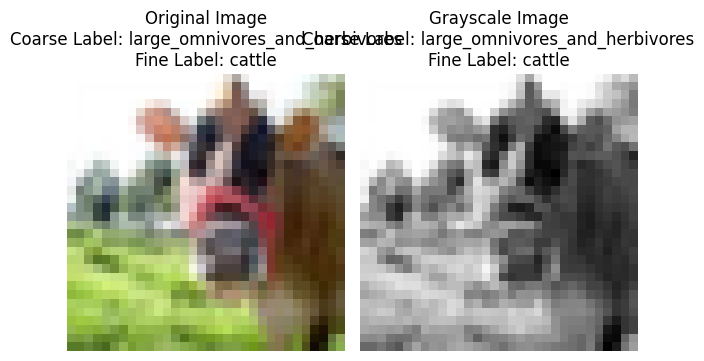

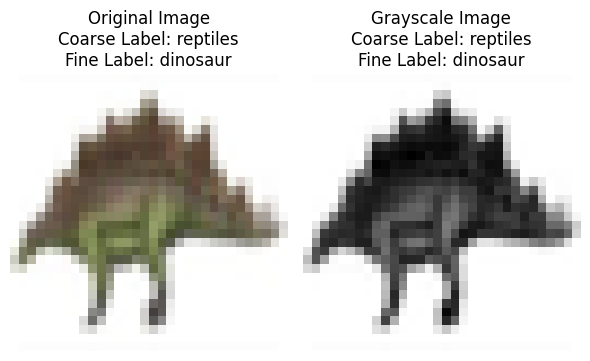

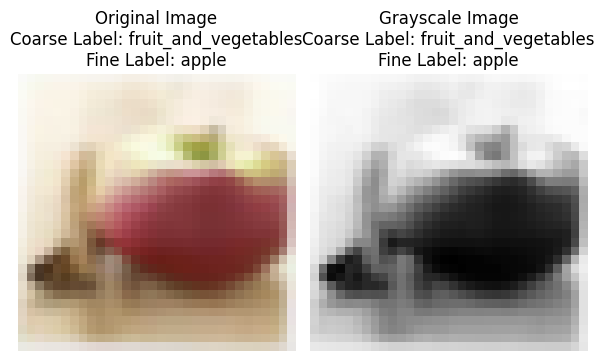

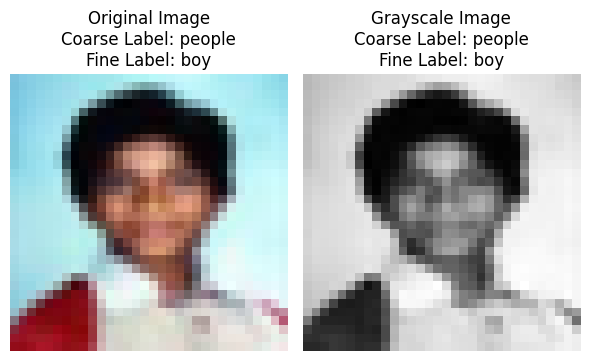

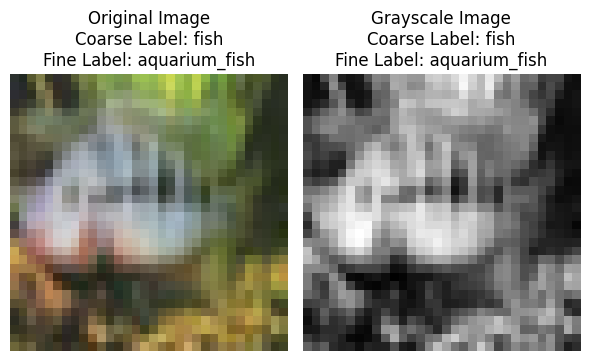

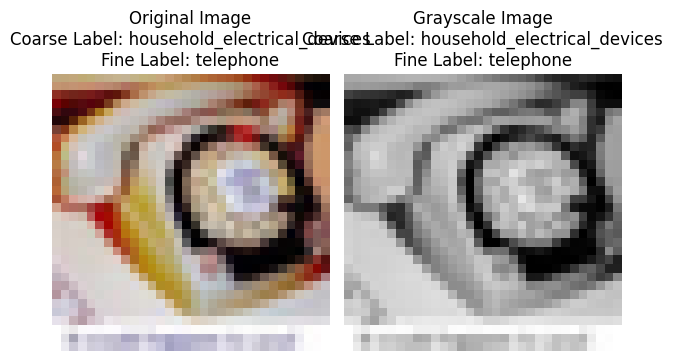

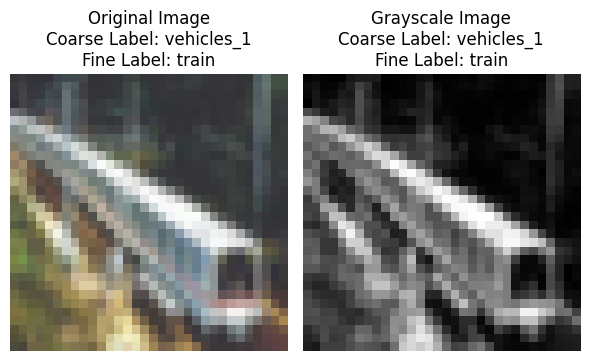

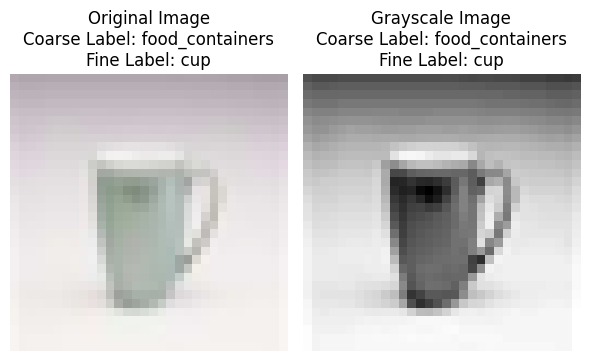

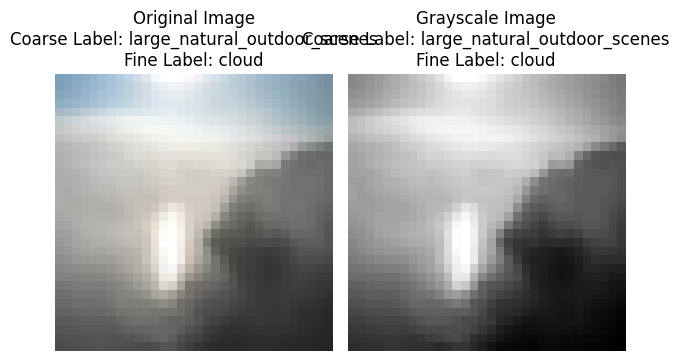

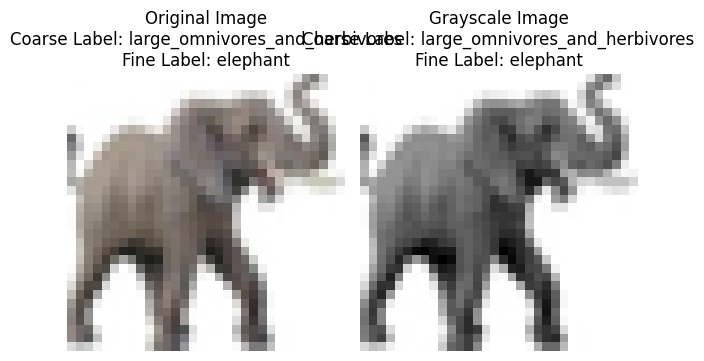

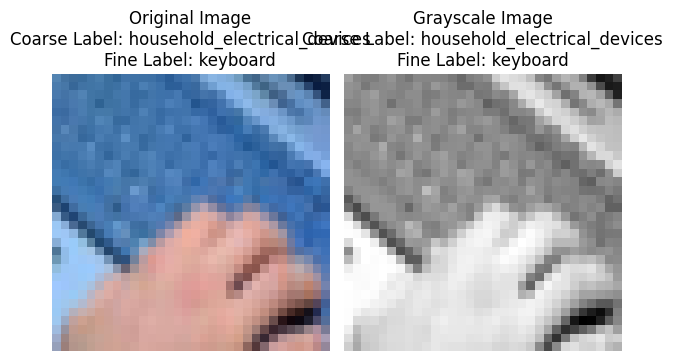

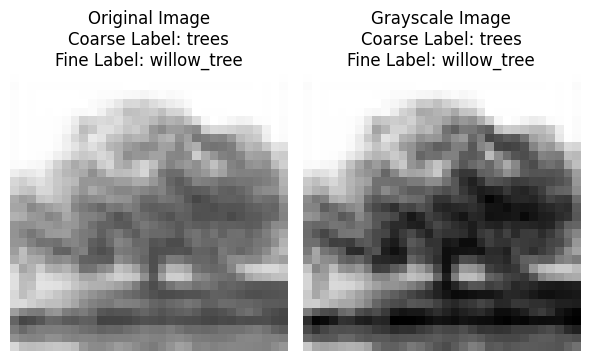

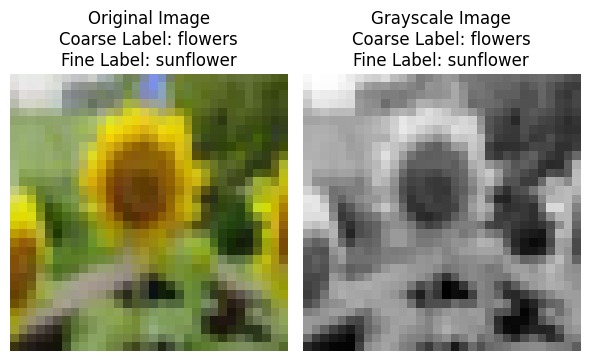

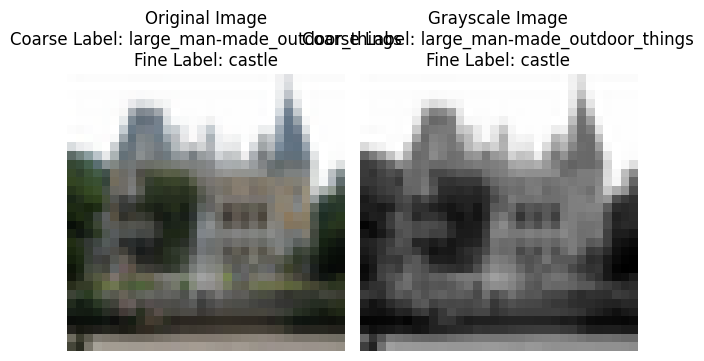

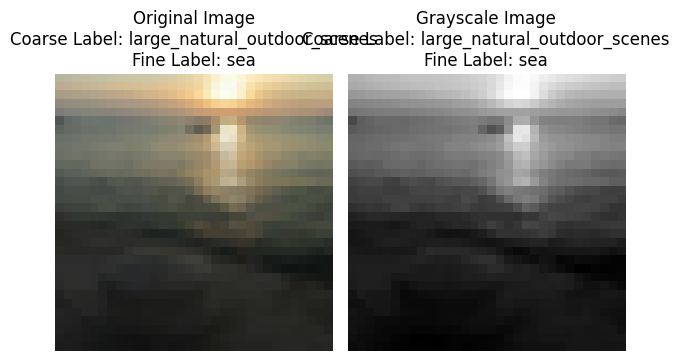

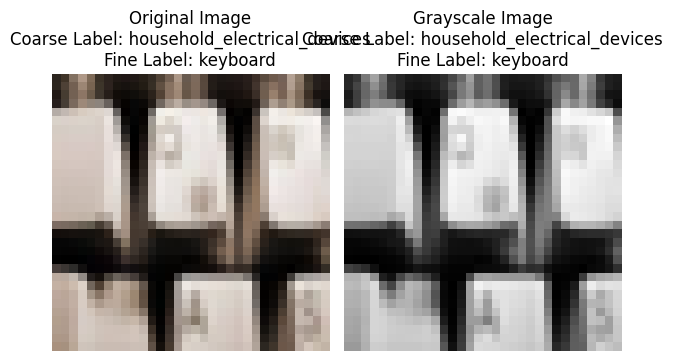

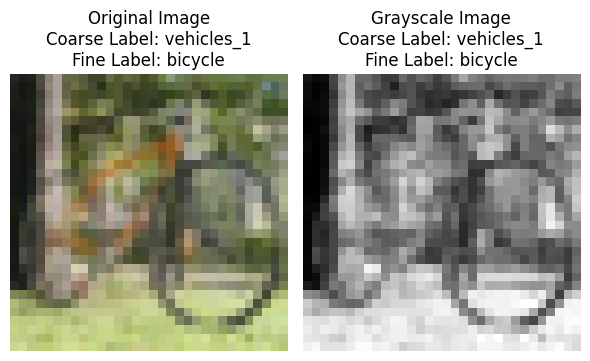

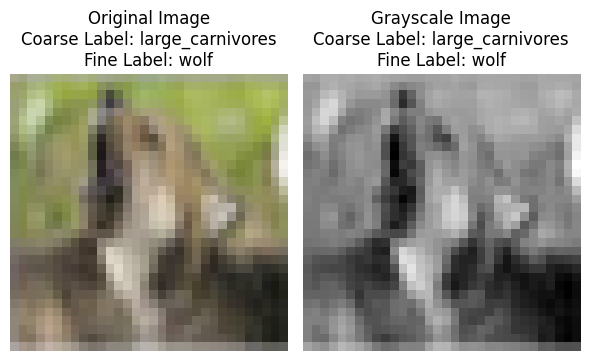

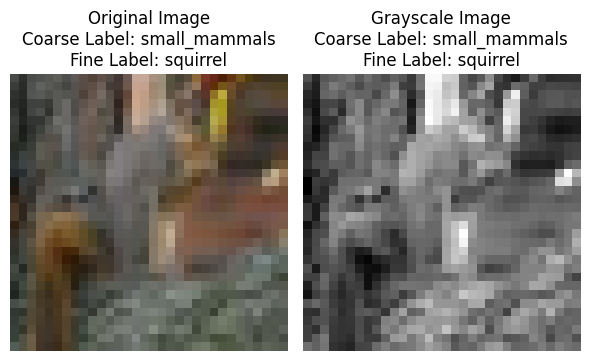

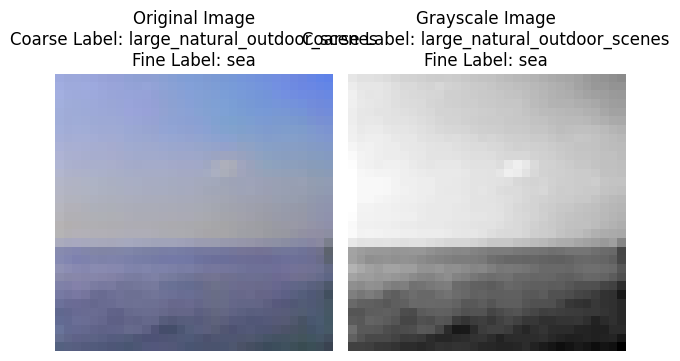

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imsave
from skimage import color
from PIL import Image

# Create a directory to save the output images
output_dir = '/content/drive/MyDrive/cifar_100_dataset/original_with_grayscale_images'
os.makedirs(output_dir, exist_ok=True)

# Visualize and save original and grayscale images
for i in range(20):  # len(train_data['data'])
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]
    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Display the original image
    fig, axs = plt.subplots(1, 2, figsize=(6,6))
    axs[0].imshow(image)
    axs[0].set_title("Original Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[0].axis('off')  # Remove axis ticks and labels

    # Convert the RGB image to grayscale using skimage
    gray_image = color.rgb2gray(image)

    # Display the grayscale image
    axs[1].imshow(gray_image, cmap="gray")
    axs[1].set_title("Grayscale Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[1].axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  # Adjust subplot spacing

    # Save the grayscale image with labels
    output_path_gray = os.path.join(output_dir, "grayscale_image_{}_{}.png".format(coarse_name, fine_name))
    pil_image = Image.fromarray((gray_image * 255).astype('uint8'))
    pil_image.save(output_path_gray)

    # Show the plot
    plt.show()


**color_jittering**

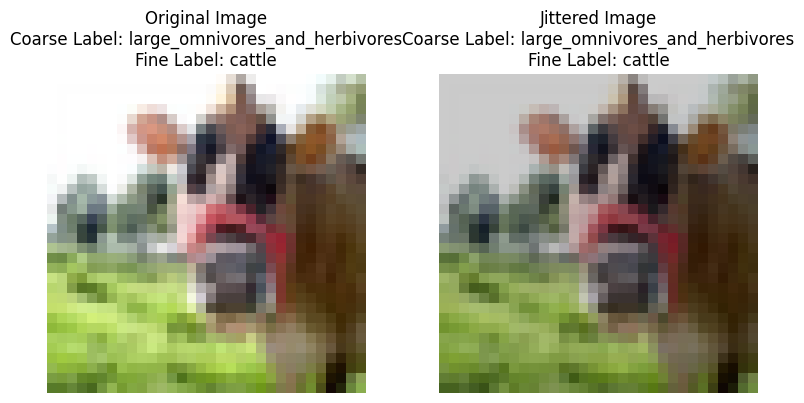

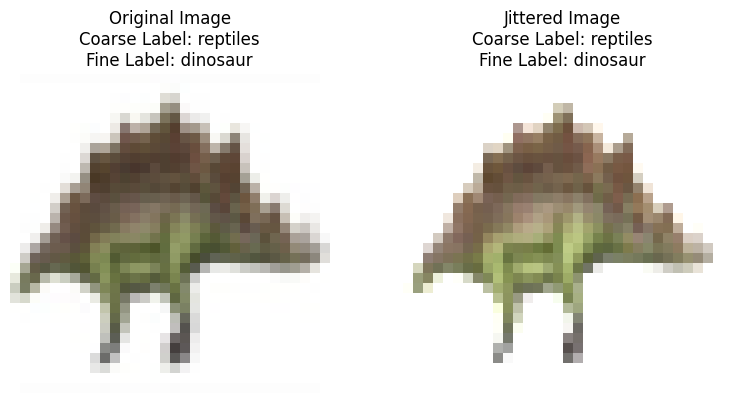

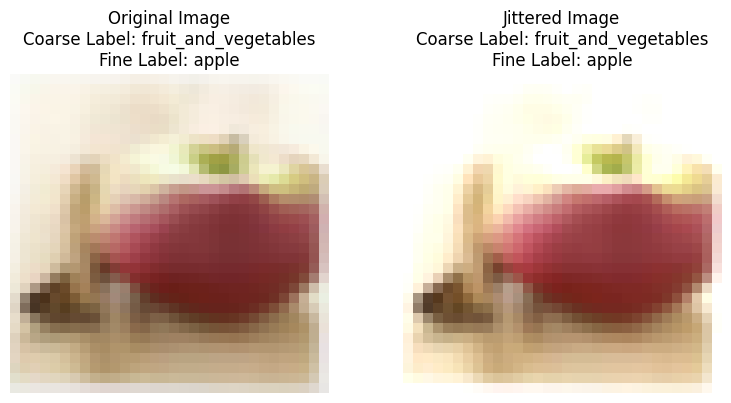

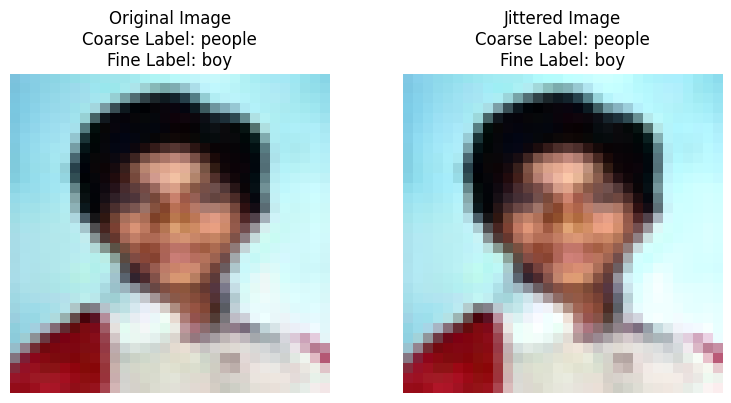

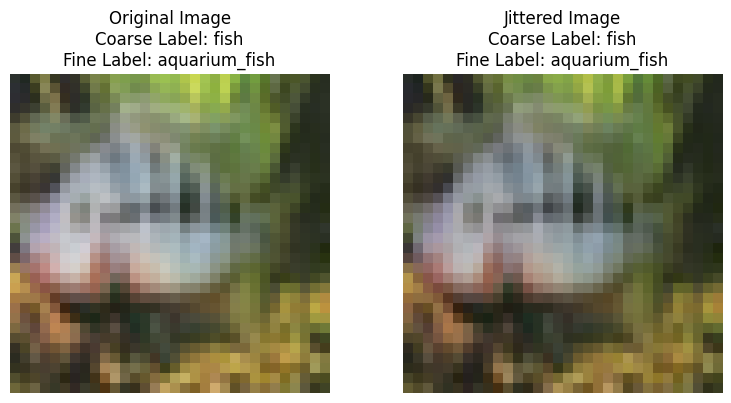

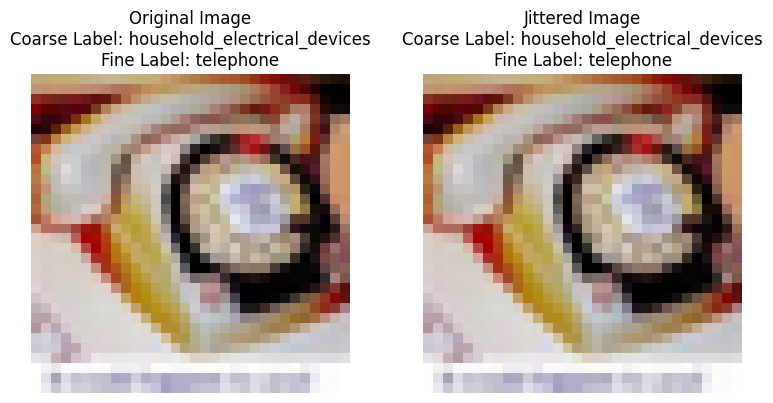

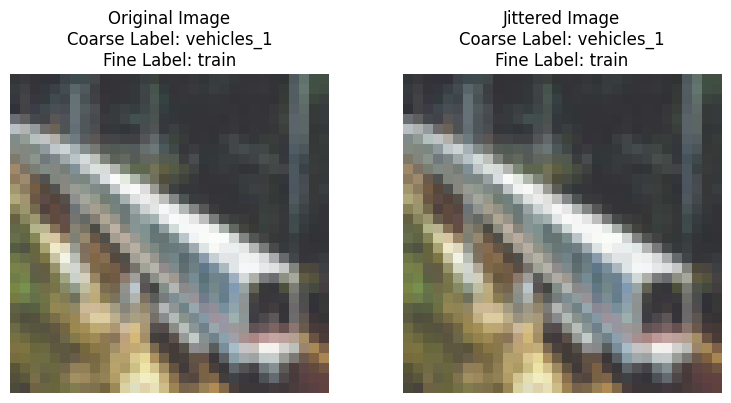

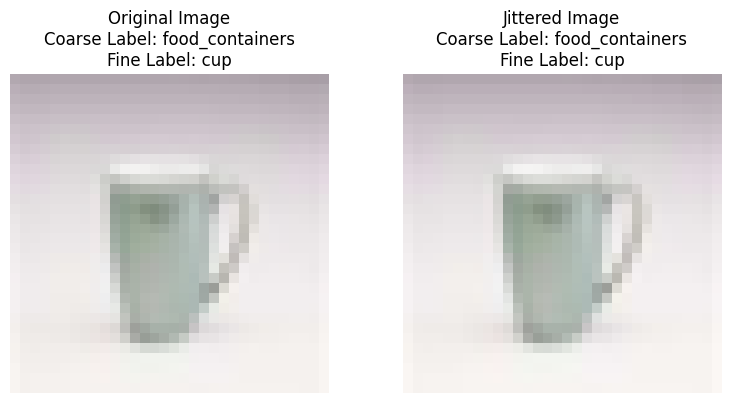

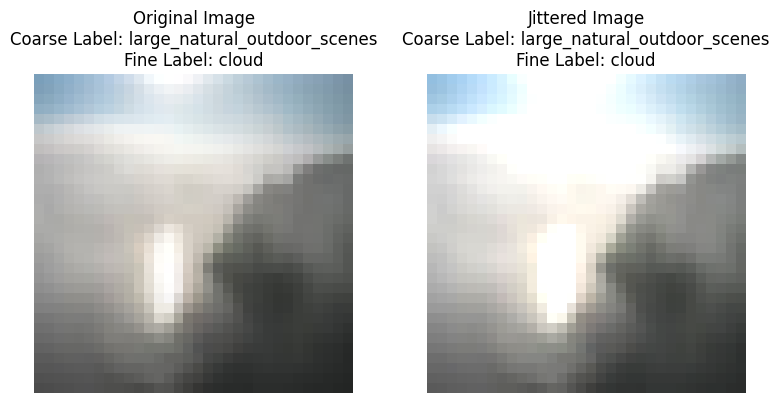

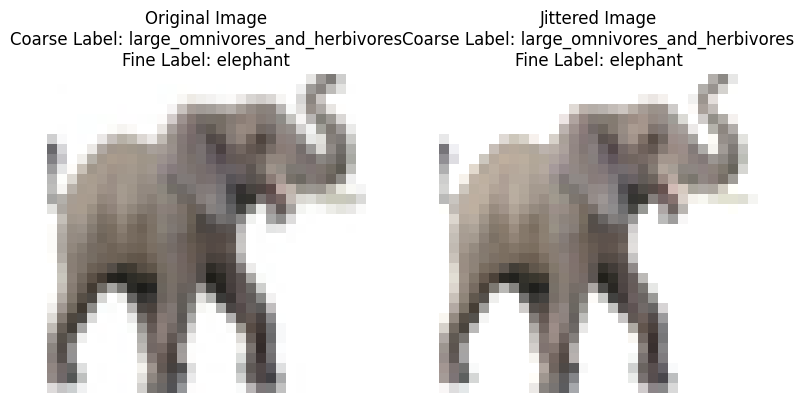

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from skimage.io import imsave
import random

output_folder = "/content/drive/MyDrive/cifar 100 dataset/original_with_color_jittering"

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Visualize and save original images with color jittered versions
for i in range(10):  # len(train_data['data'])
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]
    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Display the original and color jittered images side by side
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Display the original image
    axs[0].imshow(image)
    axs[0].set_title("Original Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[0].axis('off')  # Remove axis ticks and labels

    # Apply color jittering to the image
    jittered_image = image * (random.uniform(0.7, 1.3))
    jittered_image = np.clip(jittered_image, 0, 255).astype(np.uint8)

    # Display the jittered image
    axs[1].imshow(jittered_image)
    axs[1].set_title("Jittered Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[1].axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  # Adjust subplot spacing

    # Save the jittered image to the output folder
    output_path = os.path.join(output_folder, "jittered_image_{}.png".format(i))
    imsave(output_path, jittered_image)

    # Show the plot
    plt.show()


**random erasing**

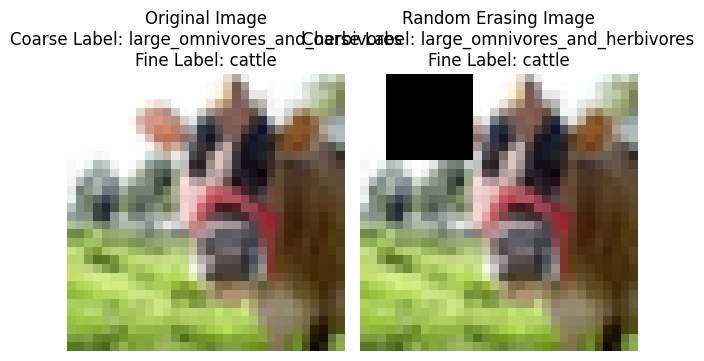

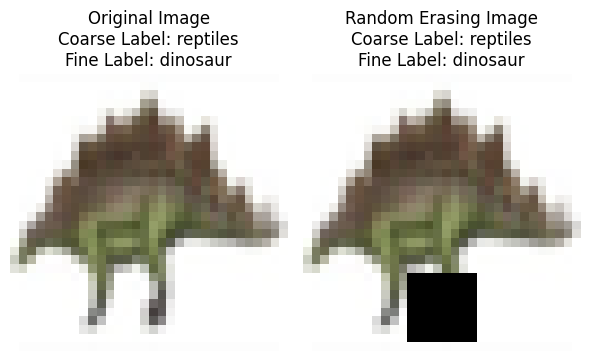

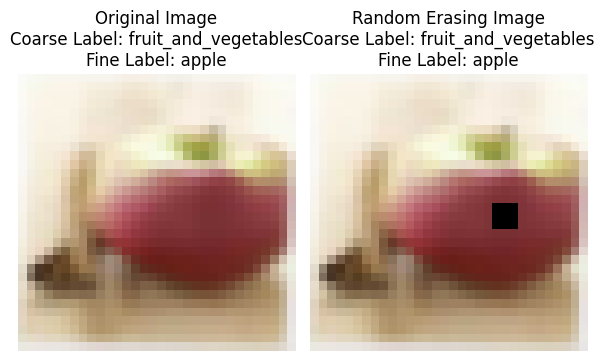

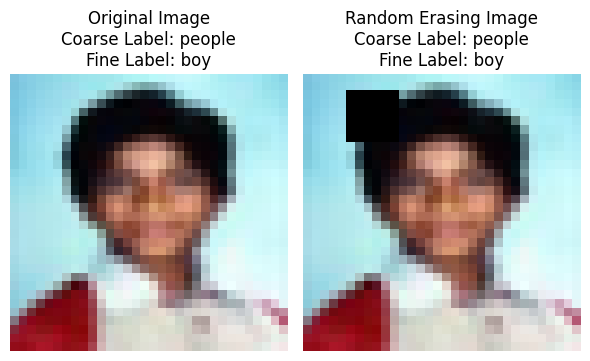

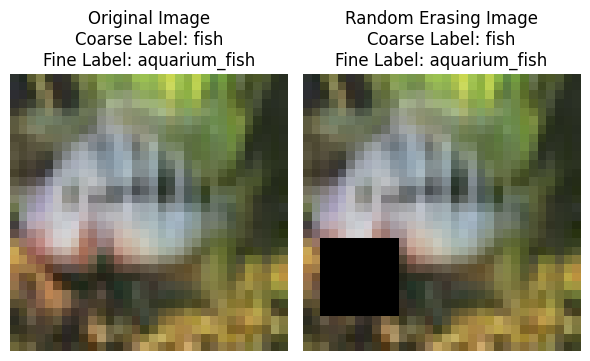

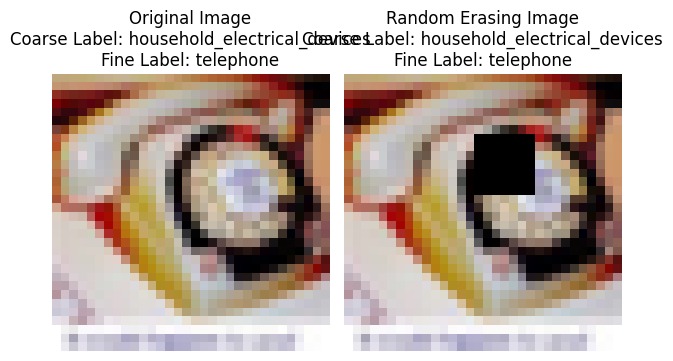

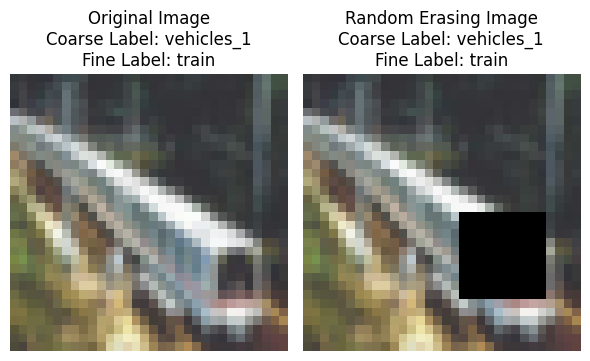

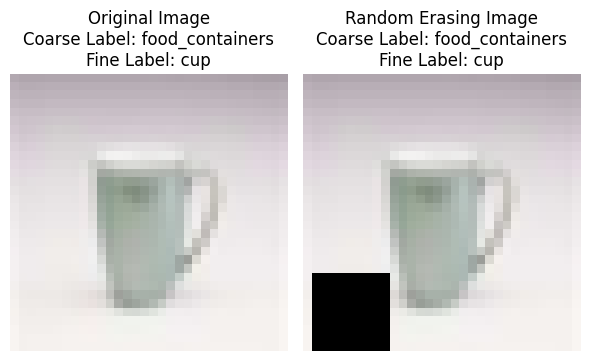

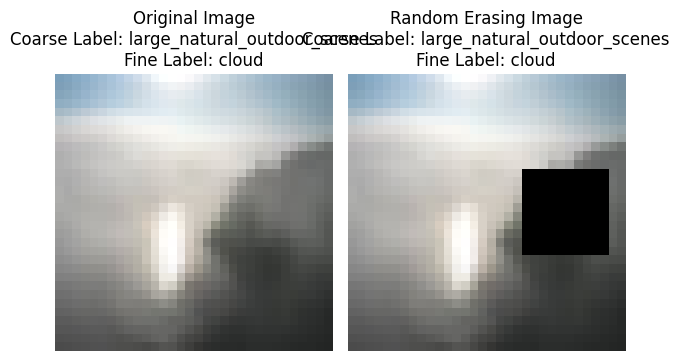

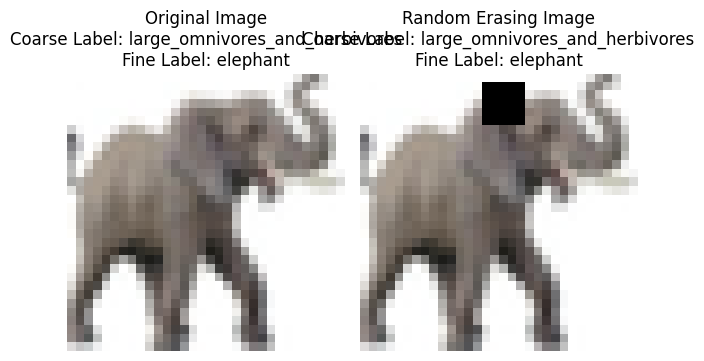

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imsave
import random

# Create a directory to save the output images
output_dir = '/content/drive/MyDrive/cifar_100_dataset/original_with_random_erasing'
os.makedirs(output_dir, exist_ok=True)

# Visualize and save original images with randomly erased versions
for i in range(10):  # len(train_data['data'])
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]
    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Display the original image
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    axs[0].imshow(image)
    axs[0].set_title("Original Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[0].axis('off')  # Remove axis ticks and labels

    # Apply random erasing to the image (probability = 100%)
    p = 1.0  # Probability of random erasing (100%)
    erasing_image = np.copy(image)
    if random.random() < p:
        h, w, _ = erasing_image.shape
        erase_size = random.uniform(0.1, 0.4)  # Randomly choose the erase size
        h_start = random.randint(0, h - int(h * erase_size))
        w_start = random.randint(0, w - int(w * erase_size))
        erasing_image[h_start:h_start + int(h * erase_size), w_start:w_start + int(w * erase_size), :] = 0

    # Display the randomly erased image
    axs[1].imshow(erasing_image)
    axs[1].set_title("Random Erasing Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[1].axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  # Adjust subplot spacing

    # Save the randomly erased image to the output folder
    output_path = os.path.join(output_dir, "erased_image_{}_{}.png".format(coarse_name, fine_name))
    imsave(output_path, erasing_image)

    # Show the plot
    plt.show()


**random perspective**

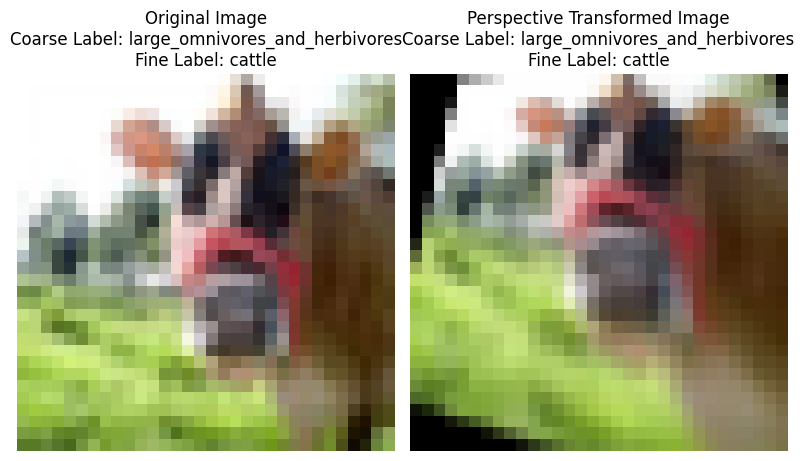

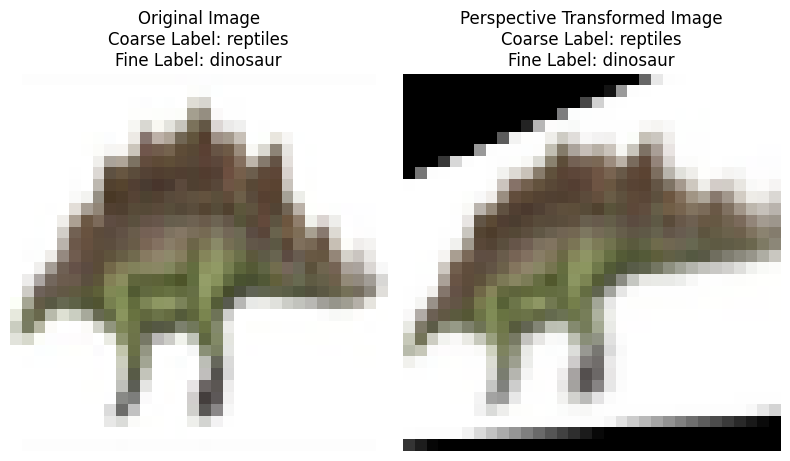

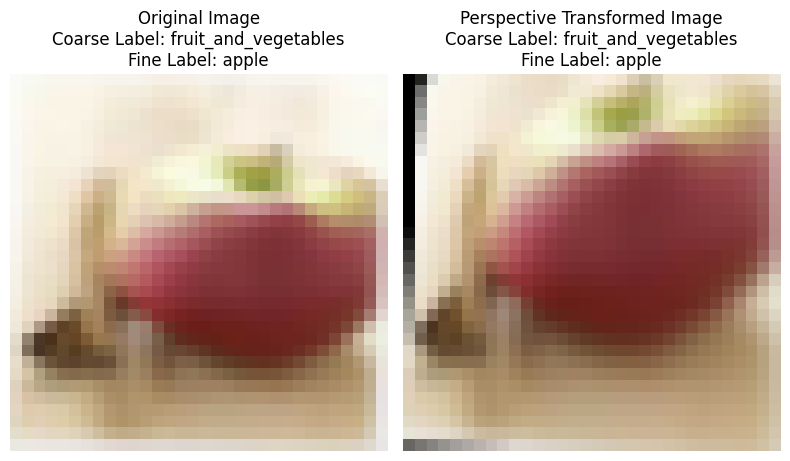

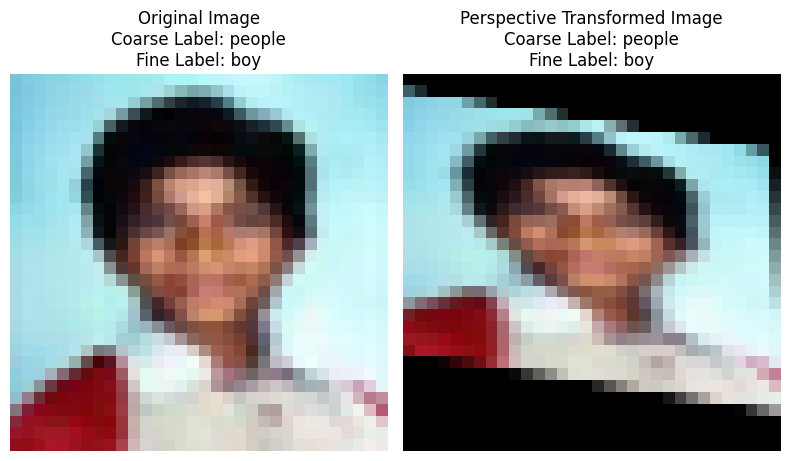

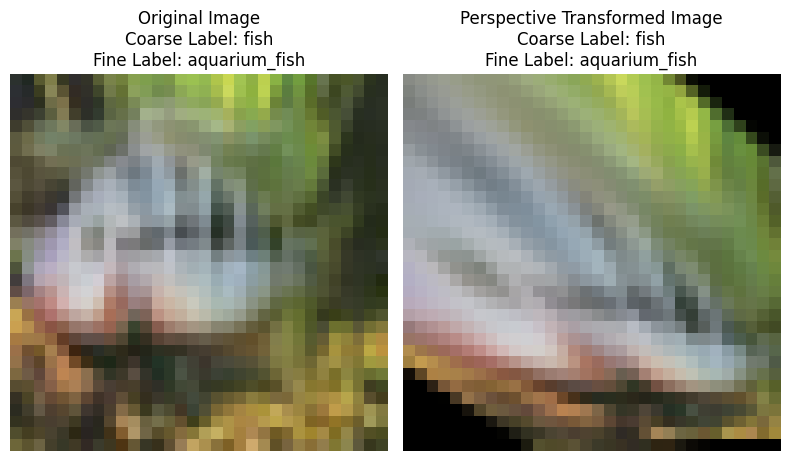

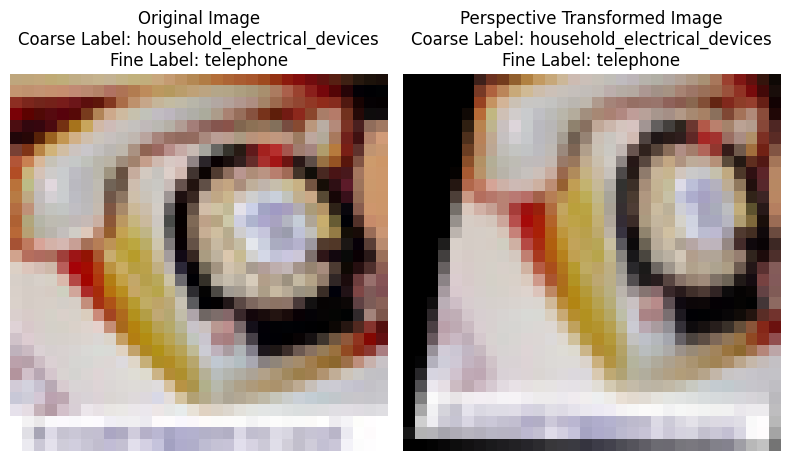

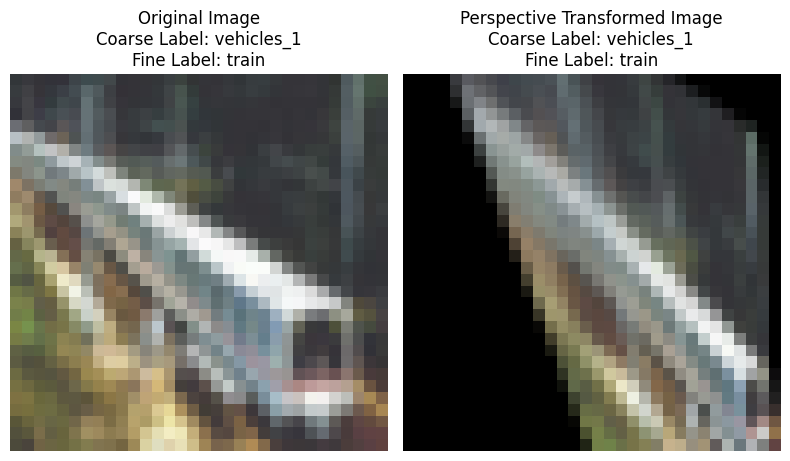

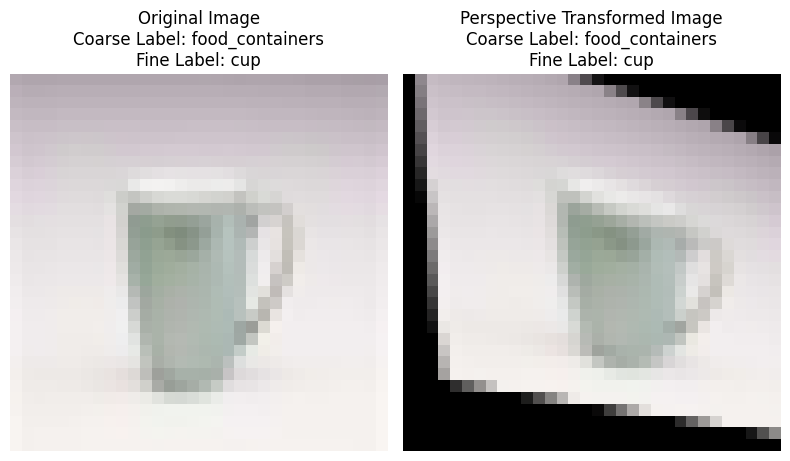

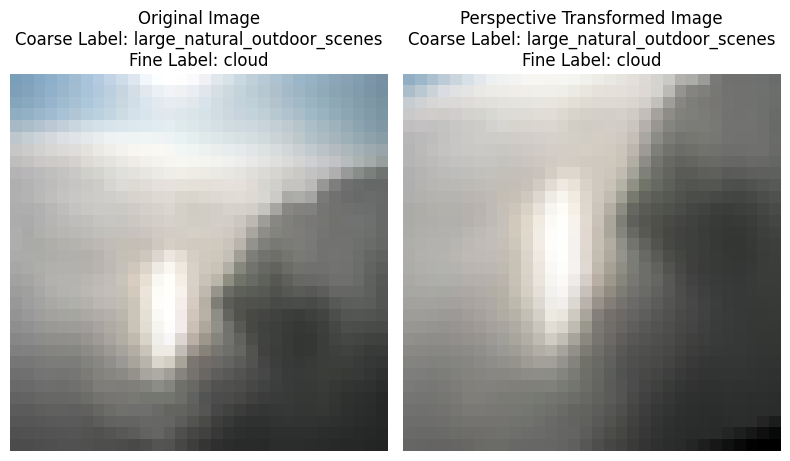

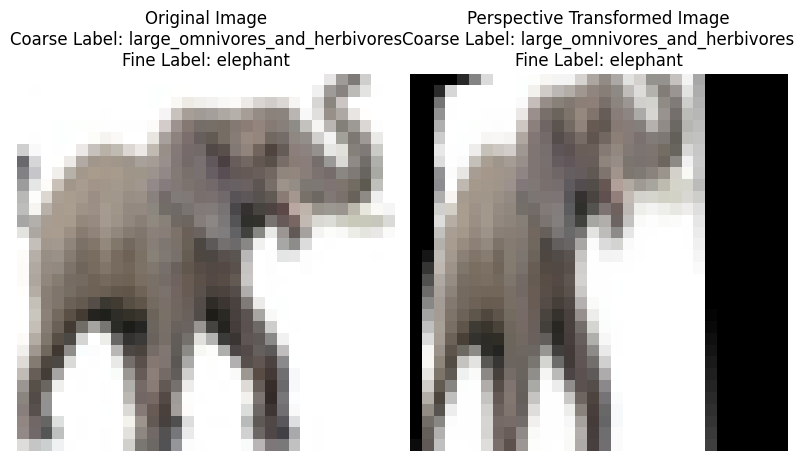

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import warp, ProjectiveTransform
from skimage.io import imsave
import random

output_folder = "/content/drive/MyDrive/cifar 100 dataset/original_with_random_perspective"

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Visualize and save original images with randomly perspective-transformed versions
for i in range(10):  #len(train_data['data'])
    # Take the i-th image from the training data
    image = train_data['data'][i]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take the coarse and fine labels of the image
    c_label = train_data['coarse_labels'][i]
    f_label = train_data['fine_labels'][i]
    # Take the coarse and fine label names of the image
    coarse_name = meta_data['coarse_label_names'][c_label]
    fine_name = meta_data['fine_label_names'][f_label]

    # Display the original and transformed images side by side
    fig, axs = plt.subplots(1, 2, figsize=(8,6))

    # Display the original image
    axs[0].imshow(image)
    axs[0].set_title("Original Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[0].axis('off')  # Remove axis ticks and labels

    # Apply random perspective transformation to the image
    perspective_image = np.copy(image)
    height, width, _ = perspective_image.shape
    # Generate random perspective transformation matrix
    src = np.array([[0, 0], [0, height], [width, height], [width, 0]])
    dst = src + np.random.randn(4, 2) * 5
    transform = ProjectiveTransform()
    transform.estimate(src, dst)
    perspective_image = warp(perspective_image, transform, output_shape=(height, width))

    # Display the transformed image
    axs[1].imshow(perspective_image)
    axs[1].set_title("Perspective Transformed Image\nCoarse Label: {}\nFine Label: {}".format(coarse_name, fine_name))
    axs[1].axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  # Adjust subplot spacing

    # Save the transformed image to the output folder
    output_path = os.path.join(output_folder, "perspective_image_{}.png".format(i))
    plt.imsave(output_path, perspective_image)

    # Show the plot
    plt.show()
